In [19]:
import numpy
import pandas
import seaborn
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [20]:
# Setting column names
names = (
    'target', 'age', 'menopause', 'tumor_size', 'inv_nodes',
    'node_caps', 'degree_of_malign', 'breast', 'breast_quadrant', 'irradiation'
)

In [21]:
# Init the dataframe from csv reader using txt file
df = pandas.read_csv('breast-cancer.txt', quotechar='"', sep=',', header=None, names=names)
df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,degree_of_malign,breast,breast_quadrant,irradiation
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [22]:
# Checks the unique values in each column for outliers
for (column, data) in df.items():
    print(column, ":", data.unique())

target : ['no-recurrence-events' 'recurrence-events']
age : ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause : ['premeno' 'ge40' 'lt40']
tumor_size : ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv_nodes : ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node_caps : ['no' 'yes' '?']
degree_of_malign : [3 2 1]
breast : ['left' 'right']
breast_quadrant : ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
irradiation : ['no' 'yes']


In [23]:
# define outlier as criteria
criteria = '?'
# save uniques value into dictionary => column_name (str) : values (list)
uniques = {}
# column = column name, data = values (rows)
for (column, data) in df.items():
    uniques[column] = data.unique().tolist()
print(uniques)

{'target': ['no-recurrence-events', 'recurrence-events'], 'age': ['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], 'menopause': ['premeno', 'ge40', 'lt40'], 'tumor_size': ['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14', '40-44', '35-39', '5-9', '45-49'], 'inv_nodes': ['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'], 'node_caps': ['no', 'yes', '?'], 'degree_of_malign': [3, 2, 1], 'breast': ['left', 'right'], 'breast_quadrant': ['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'], 'irradiation': ['no', 'yes']}


In [24]:
# replace outlier '?' by nan

# column = column name, data = values (rows)
for column, _ in uniques.items():
    df[column].mask(df[column] == '?', numpy.nan, inplace=True)

In [25]:
# Remove missing values
df = df.dropna()
df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,degree_of_malign,breast,breast_quadrant,irradiation
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [26]:
# Checks the unique values in each column for outliers
for (column, data) in df.items():
    print(column, ":", data.unique())

target : ['no-recurrence-events' 'recurrence-events']
age : ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
menopause : ['premeno' 'ge40' 'lt40']
tumor_size : ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inv_nodes : ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
node_caps : ['no' 'yes']
degree_of_malign : [3 2 1]
breast : ['left' 'right']
breast_quadrant : ['left_low' 'right_up' 'left_up' 'right_low' 'central']
irradiation : ['no' 'yes']


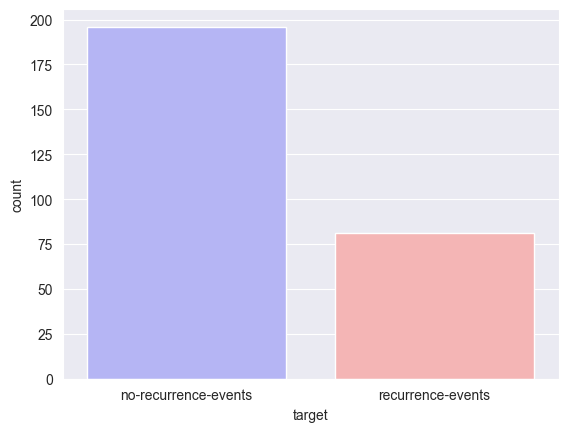

In [27]:
# 0 : no recurrence events
# 1 : recurrence events
seaborn.countplot(x="target", data=df, palette="bwr")
pyplot.show()

In [28]:
numeric_df = df.copy()

for column, data in df.items():
    if not pandas.api.types.is_numeric_dtype(numeric_df[column]):
        uniques = data.unique().tolist()
        mapping = {value: index for index, value in enumerate(uniques)}
        numeric_df[column] = numeric_df[column].map(mapping)

numeric_df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,degree_of_malign,breast,breast_quadrant,irradiation
0,0,0,0,0,0,0,3,0,0,0
1,0,1,0,1,0,0,2,1,1,0
2,0,1,0,1,0,0,2,0,0,0
3,0,2,1,2,0,0,2,1,2,0
4,0,1,0,3,0,0,2,1,3,0


In [29]:
def split(_df: pandas.DataFrame, _column: str, test_size: float = 0.3):
    # Declare feature vector and target variable
    _X = numeric_df.drop([_column], axis=1)
    _y = numeric_df[_column]
    _X_train, _X_test, _y_train, _y_test = train_test_split(_X, _y, test_size=test_size, random_state=0)
    return _X_train, _X_test, _y_train, _y_test

In [30]:
def naive_bayes(_df: pandas.DataFrame, _column: str, test_size: float = 0.3):
    _X_train, _X_test, _y_train, _y_test = split(df, _column, test_size)
    # check the shape of X_train and X_test
    print("Shapes: ", "x train", _X_train.shape, ", ", "x test", _X_test.shape)

    # train a Gaussian Naive Bayes classifier on the training set

    # instantiate the model
    _gnb = GaussianNB()

    # fit the model
    _gnb.fit(_X_train, _y_train)

    _y_pred = _gnb.predict(_X_test)

    _accuracy = accuracy_score(_y_test, _y_pred)
    _confusion_matrix = confusion_matrix(_y_test, _y_pred)
    return _accuracy, _confusion_matrix

In [31]:
# SMOTE Pre-processing
sm = SMOTE()
X_train, _, y_train, _ = split(_df=numeric_df, _column='target')
X_res, y_res = sm.fit_resample(X_train, y_train)
X_res.shape, y_res.shape

((284, 9), (284,))

In [32]:
    # Panda Series to Dataframe
y_smote = y_res.to_frame(name='target')

# Concatenating both dataframes
X_smote = X_res
df_smote = pandas.concat([y_smote, X_smote], axis=1)

df_smote.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,degree_of_malign,breast,breast_quadrant,irradiation
0,1,1,0,4,2,1,3,1,2,0
1,1,1,0,0,4,1,3,0,0,0
2,0,3,1,6,0,0,1,1,2,0
3,0,3,1,2,0,0,2,1,0,0
4,1,0,0,0,0,0,1,1,2,0


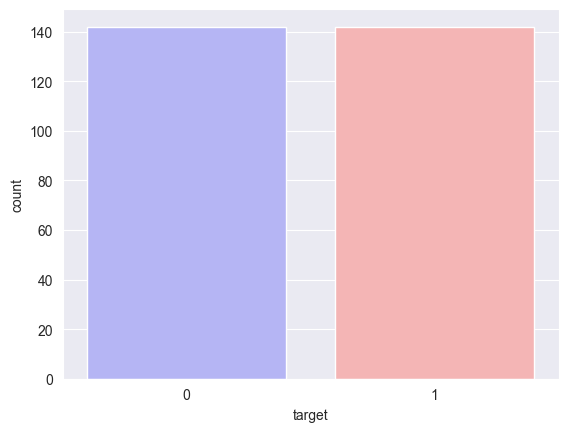

In [33]:
# 0 : no recurrence events
# 1 : recurrence events
seaborn.countplot(x="target", data=df_smote, palette="bwr")
pyplot.show()

In [34]:
mining_models = {
    'Naive Bayes + SMOTE': df_smote
}

for model, dataset in mining_models.items():
    print("Model", model, '\n')
    acc, cm = naive_bayes(df_smote, 'target')
    print('Model accuracy score: {0:0.10f}'.format(acc), '\n')

Model Naive Bayes + SMOTE 

Shapes:  x train (193, 9) ,  x test (84, 9)
Model accuracy score: 0.6785714286 



In [44]:
# Create dataframe for ANN model
modified_df = df.copy()
uniques = modified_df['target'].unique()
mapping = {value: index for index, value in enumerate(uniques)}
modified_df['target'] = modified_df['target'].map(mapping)
modified_df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,degree_of_malign,breast,breast_quadrant,irradiation
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [58]:
X = modified_df.drop(['target'], axis=1)
y = modified_df['target']

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()
indexes = [5, 7, 9]
for index in indexes:
    X.loc[:, index] = encoder.fit_transform(X.iloc[:, index])

one_hot_encoder = OneHotEncoder(max_categories=1)
X = one_hot_encoder.fit_transform(X).toarray()
X = X[:, 1:]

X.view()

C:\Users\Isaias\PycharmProjects\data-mining\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Isaias\PycharmProjects\data-mining\venv\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=51))
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=51))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [73]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 4ms/step - loss: 0.6905 - accuracy: 0.7358
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.7358
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.7358
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 0.7358
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.7358
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7358
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5373 - accuracy: 0.7358
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7358
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7358
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.7358
Epoch 11/

In [74]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 3ms/step


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  6]
 [18 12]]


0.7142857142857143